In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
import pickle
from matplotlib import pylab as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import scipy as scipy
from scipy import stats

In [2]:
df = pd.read_pickle('BBresults.pkl')
pd.set_option('display.max_columns', None)

#creating distance columns
split_df = pd.DataFrame(df['distance'].tolist(), columns=['dist_meters', 'dist_degrees'])
df = pd.concat([df, split_df], axis=1)
dfB=df[df['channel'] == 'BHZ'] #sorting results for just broadband responses 
dfR=df[df['channel'] == 'EHZ']
dfRS=dfR[dfR['npts']==36001]


dfRS

netstatchan network station location channel  \
4280   AM.R9CDF.00.EHZ      AM   R9CDF       00     EHZ   
4281   AM.RAA90.00.EHZ      AM   RAA90       00     EHZ   
4282   AM.RB079.00.EHZ      AM   RB079       00     EHZ   
4283   AM.RC74C.00.EHZ      AM   RC74C       00     EHZ   
4284   AM.RC98F.00.EHZ      AM   RC98F       00     EHZ   
...                ...     ...     ...      ...     ...   
26288  AM.S2D97.00.EHZ      AM   S2D97       00     EHZ   
26289  AM.S4458.00.EHZ      AM   S4458       00     EHZ   
26290  AM.S8086.00.EHZ      AM   S8086       00     EHZ   
26291  AM.S8618.00.EHZ      AM   S8618       00     EHZ   
26292  AM.SAC78.00.EHZ      AM   SAC78       00     EHZ   

                         starttime                      endtime  \
4280   2022-05-26T15:42:42.301999Z  2022-05-26T15:48:42.301999Z   
4281   2022-05-26T15:42:40.225000Z  2022-05-26T15:48:40.225000Z   
4282   2022-05-26T15:42:36.289000Z  2022-05-26T15:48:36.289000Z   
4283   2022-05-26T15:42:52.121000Z  2022-05-26T15:48:52.121000Z   
4284   2022-05-26T15:42:48.896999Z  2022-05-26T15:48:48.896999Z   
...                            ...                          ...   
26288  2021-01-11T21:37:36.692000Z  2021-01-11T21:43:36.692000Z   
26289  2021-01-11T21:37:11.884000Z  2021-01-11T21:43:11.884000Z   
26290  2021-01-11T21:37:30.858999Z  2021-01-11T21:43:30.858999Z   
26291  2021-01-11T21:37:31.930000Z  2021-01-11T21:43:31.930000Z   
26292  2021-01-11T21:43:38.548999Z  2021-01-11T21:49:38.548999Z   

                        phasePtime sampling_rate delta   npts calib  \
4280   2022-05-26T15:43:42.299359Z         100.0  0.01  36001   1.0   
4281   2022-05-26T15:43:40.227010Z         100.0  0.01  36001   1.0   
4282   2022-05-26T15:43:36.290982Z         100.0  0.01  36001   1.0   
4283   2022-05-26T15:43:52.125055Z         100.0  0.01  36001   1.0   
4284   2022-05-26T15:43:48.901962Z         100.0  0.01  36001   1.0   
...                            ...           ...   ...    ...   ...   
26288  2021-01-11T21:38:36.693417Z         100.0  0.01  36001   1.0   
26289  2021-01-11T21:38:11.883563Z         100.0  0.01  36001   1.0   
26290  2021-01-11T21:38:30.854831Z         100.0  0.01  36001   1.0   
26291  2021-01-11T21:38:31.930906Z         100.0  0.01  36001   1.0   
26292  2021-01-11T21:44:38.552661Z         100.0  0.01  36001   1.0   

               az         baz                  coordinates  \
4280   230.439282   64.338401  [-38.01801802, 145.2965215]   
4281   221.543111   54.536006  [-41.42342342, 148.2722338]   
4282   310.413555  135.238864  [-4.288288288, 152.0119884]   
4283   244.760611   79.198898  [-31.95495495, 141.4405111]   
4284    232.67141   67.164388  [-37.36936937, 143.9003982]   
...           ...         ...                          ...   
26288  215.616837   24.392683   [28.06306306, 83.25088716]   
26289  116.975589  315.884972   [36.79279279, 127.1160104]   
26290   213.01947   22.763217    [28.1981982, 84.73599152]   
26291  213.663205   23.177956    [28.1981982, 84.38905149]   
26292   28.516765  333.888081  [47.30630631, -122.4260348]   

                                       distance       pinc       prayp  \
4280   [3063212.8018230204, 27.535286757106846]  27.867992  513.454306   
4281     [3035625.2134195776, 27.3042191266884]   27.91574  514.263362   
4282   [2982456.0157654737, 26.866319331439303]  28.002072  515.725303   
4283   [3188296.1948399195, 28.636011832103193]  27.626445   509.35598   
4284   [3145930.3910365356, 28.273963791309452]  27.709946  510.773759   
...                                         ...        ...         ...   
26288  [2954773.0920904893, 26.587389915813343]  28.068447  516.848497   
26289   [2656562.6724434416, 23.85654257449571]  28.475164  523.715718   
26290   [2882671.4249220914, 25.94134958757092]  28.180419   518.74171   
26291  [2895965.0033587283, 26.060238989685534]  28.160238  518.400627   
26292    [8337347.445642128, 74.75722284165803]  17.594337  332.034199   

          

In [3]:
#comparing distance and ebbcorrpertaclognorm

dflast_event=dfB[dfB['eventname'] == '2021011100']
lognorm = dflast_event['ebbcorrpertaclognorm'].tolist()
lognormmean=np.mean(lognorm) 
#print(lognormmean)

dflast_eventRS=dfRS[dfRS['eventname'] == '2022071200']
lognormRS = dflast_eventRS['ebbcorrpertaclognorm'].tolist()
dist_degrees=dflast_eventRS['dist_degrees'].tolist()
depth=dflast_eventRS['edepth'].tolist()
lognormmeanRS=np.mean(lognormRS)
#print(lognormmeanRS)


import plotly.express as px
import plotly.graph_objects as go
fig1 = px.scatter(x=dist_degrees, y=lognormRS, trendline="ols", 
                  trendline_color_override='red', title='2022071200', labels={"x":"Distance in Degrees", 
                                                                                "y":"ebbcorpertaclognorm"})

fig1.add_hline(y=lognormmean)
fig1

###T-test

#scipy.stats.ttest_ind(lognorm, lognormRS, axis=0, equal_var=True, nan_policy='propagate', 
                     # permutations=None, random_state=None, alternative='two-sided', trim=0)

In [4]:
dfevents = pd.read_pickle('Combined_Results.pkl')
eventlist= dfevents["eventname"]
eventlist

0     2019010600
1     2019011500
2     2019012000
3     2019012200
4     2019040900
         ...    
77    2022033100
78    2022051900
79    2022052601
80    2022060400
81    2022071200
Name: eventname, Length: 82, dtype: object

In [5]:
for event in eventlist:
    dflast_event=dfB[dfB['eventname'] == 'eventname']
    lognorm = dflast_event['ebbcorrpertaclognorm'].tolist()
    lognormmean=np.mean(lognorm) 
    #print(lognormmean)

    dflast_eventRS=dfRS[dfRS['eventname'] == 'eventname']
    lognormRS = dflast_eventRS['ebbcorrpertaclognorm'].tolist()
    dist_degrees=dflast_eventRS['dist_degrees'].tolist()
    #depth=dflast_eventRS['edepth'].tolist()
    lognormmeanRS=np.mean(lognormRS)
    #print(lognormmeanRS)


    import plotly.express as px
    import plotly.graph_objects as go
    fig1 = px.scatter(x=dist_degrees, y=lognormRS, trendline="ols", 
                      trendline_color_override='red', title=event, labels={"x":"Distance in Degrees", 
                                                                                    "y":"ebbcorpertaclognorm"})

    fig1.add_hline(y=lognormmean)
    fig1

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

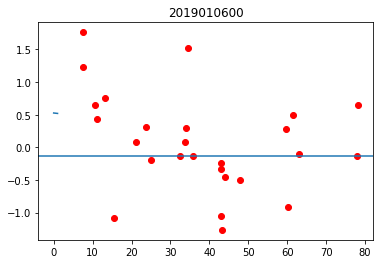

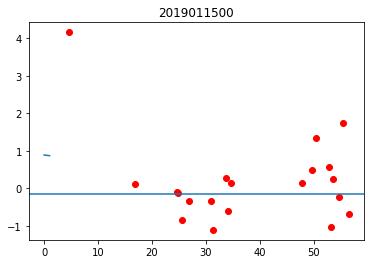

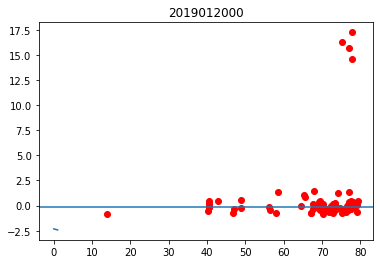

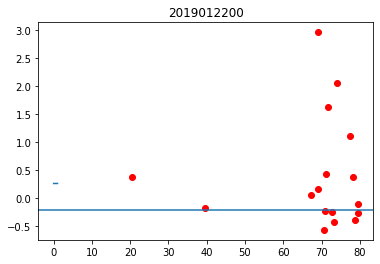

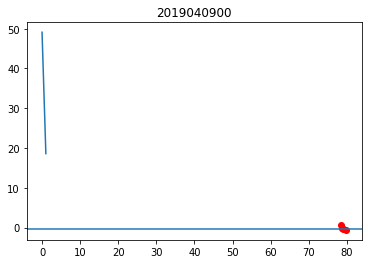

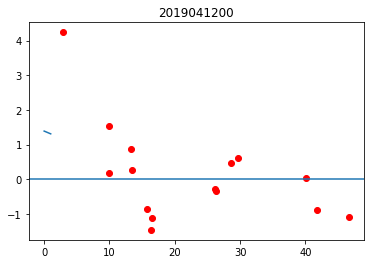

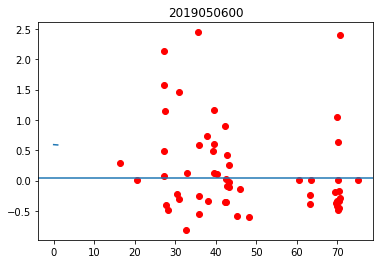

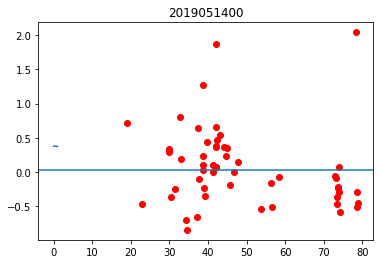

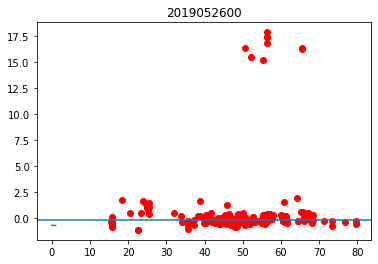

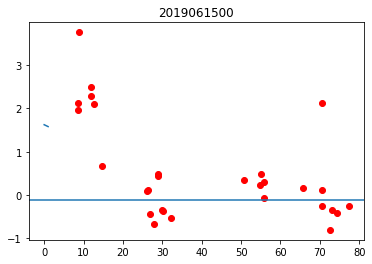

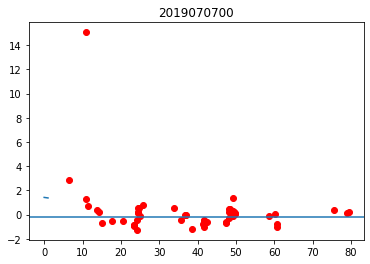

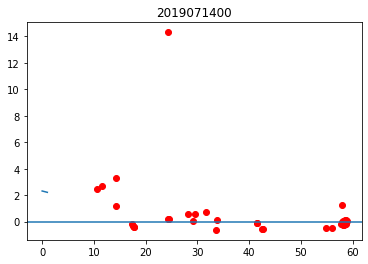

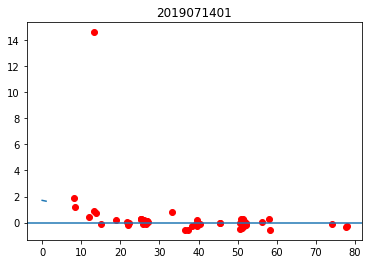

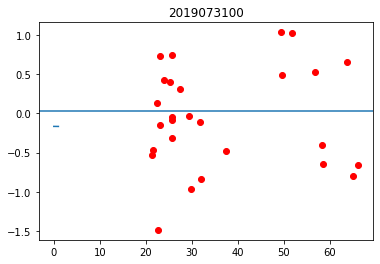

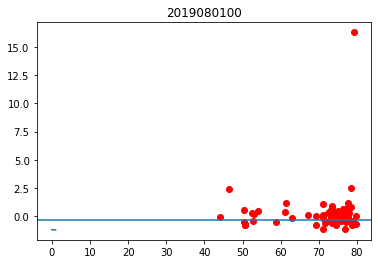

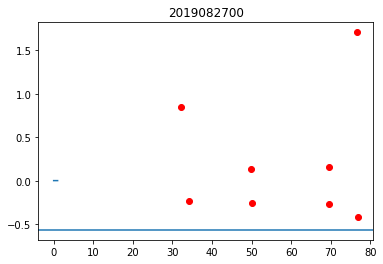

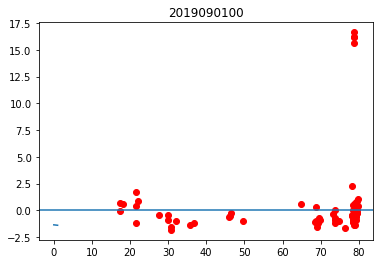

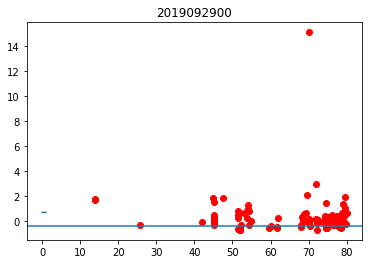

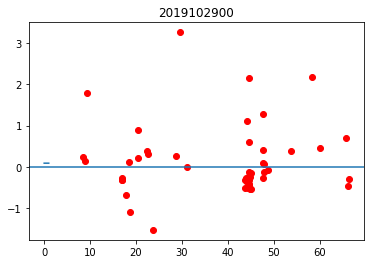

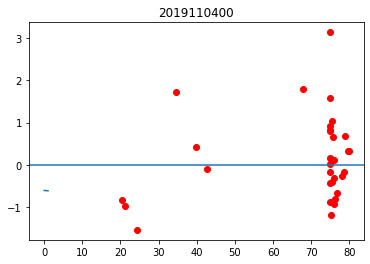

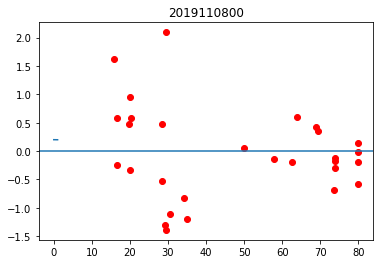

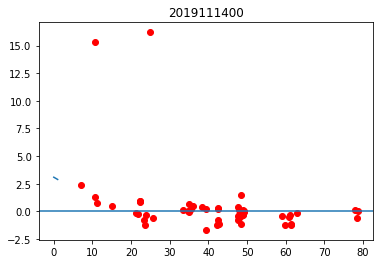

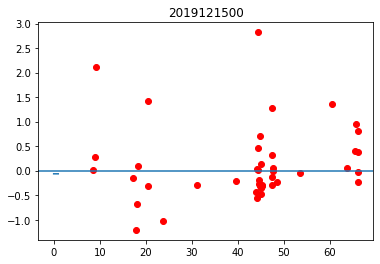

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning:

Polyfit may be poorly conditioned



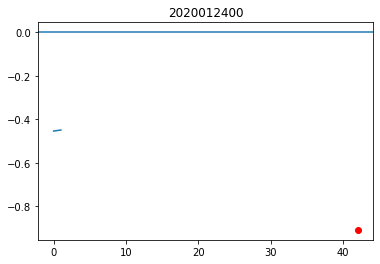

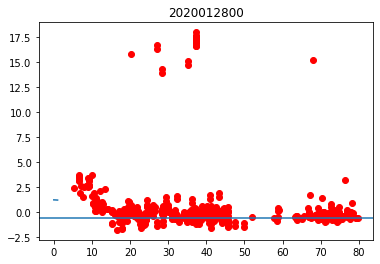

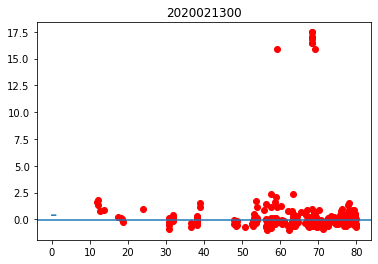

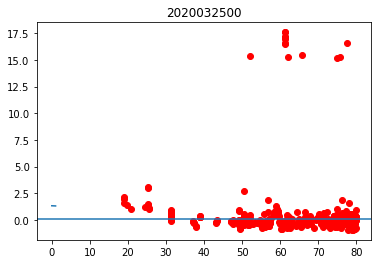

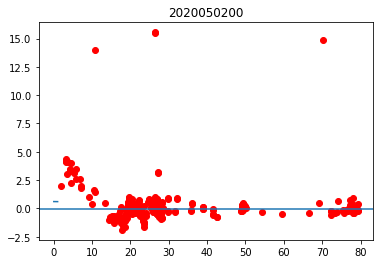

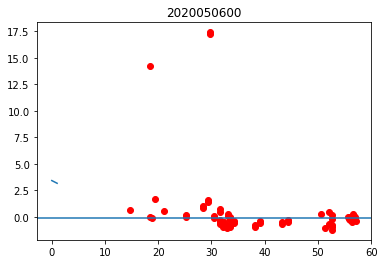

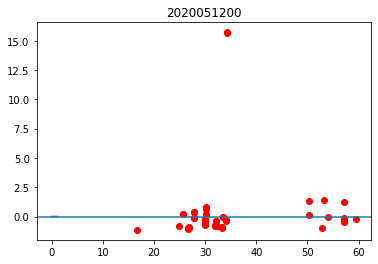

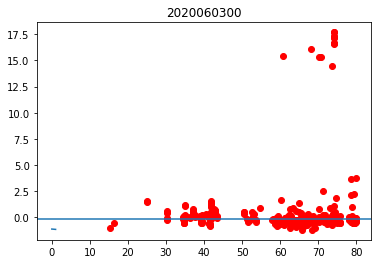

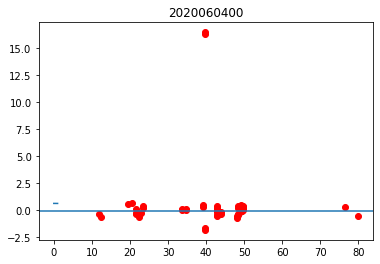

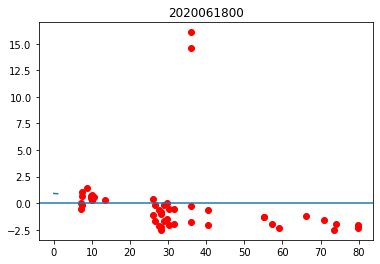

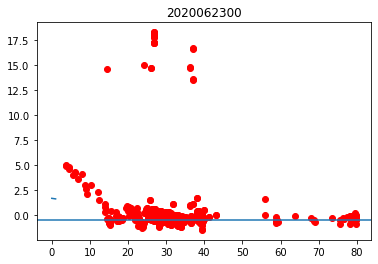

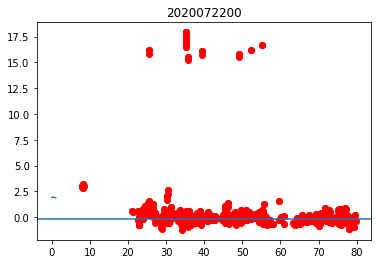

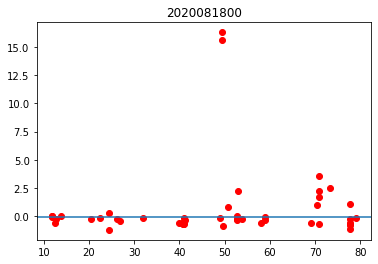

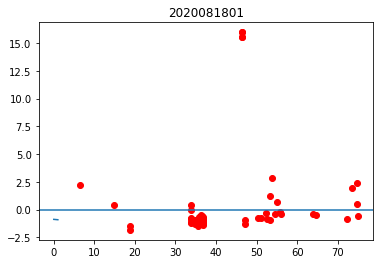

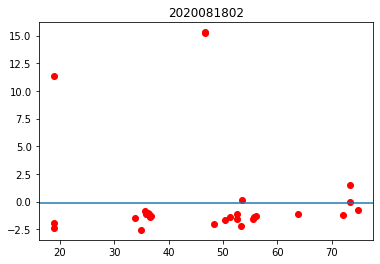

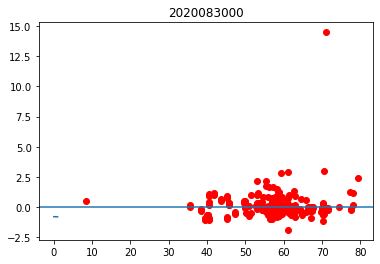

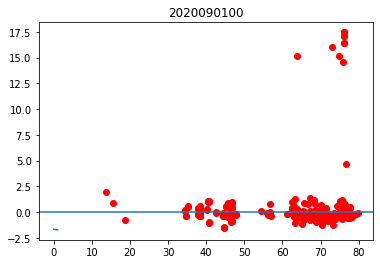

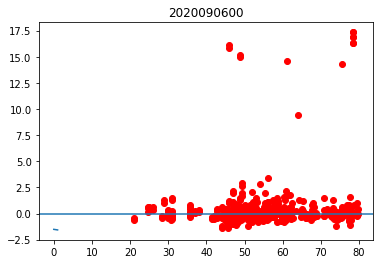

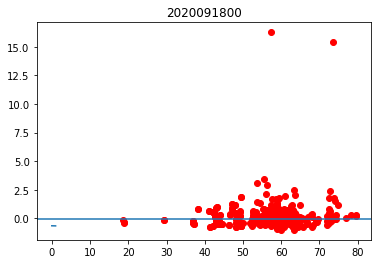

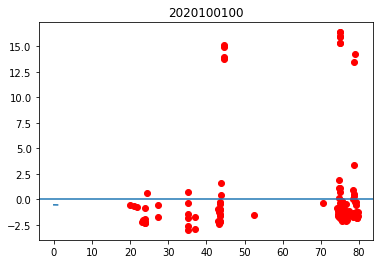

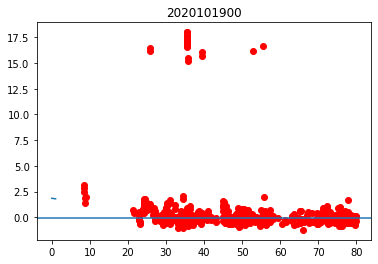

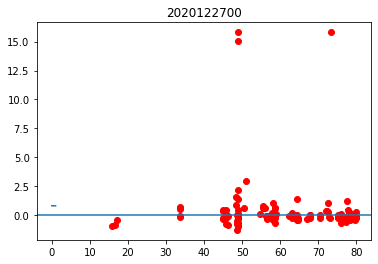

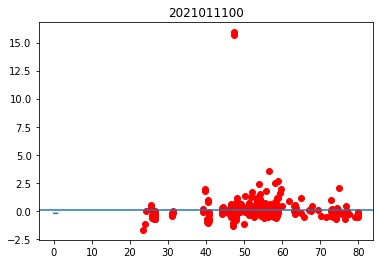

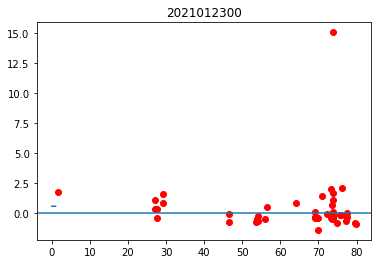

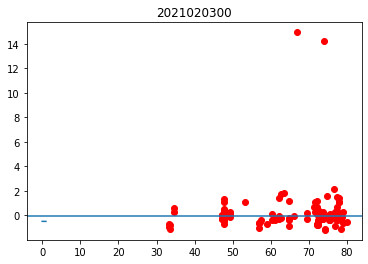

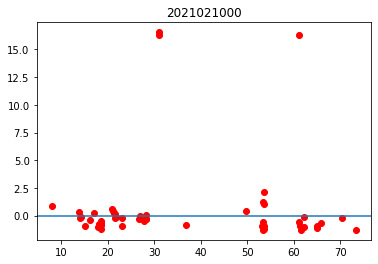

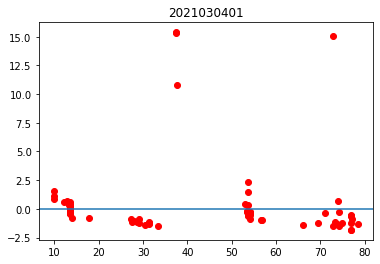

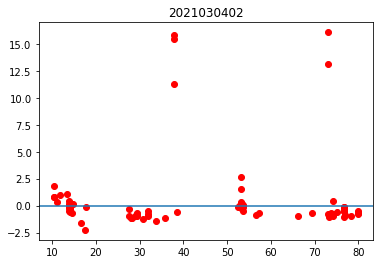

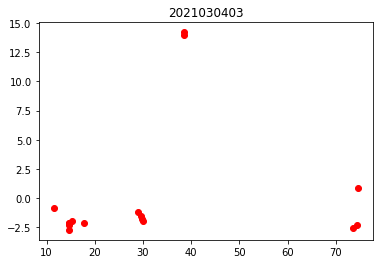

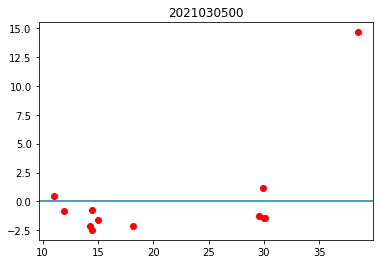

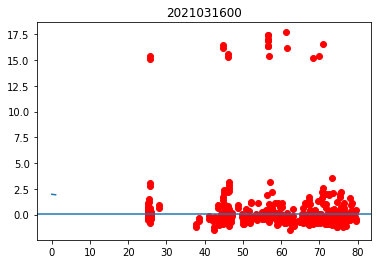

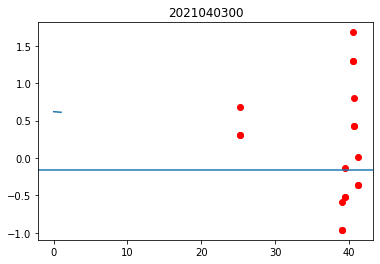

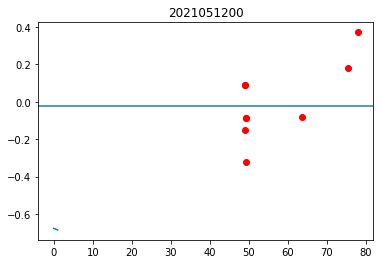

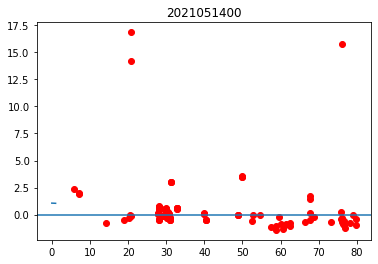

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning:

Polyfit may be poorly conditioned



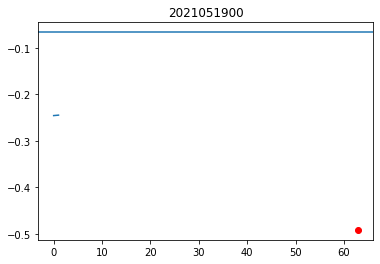

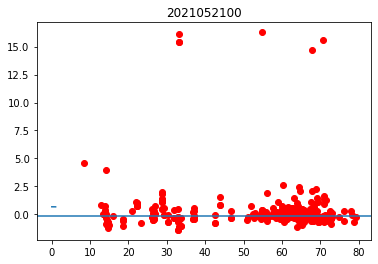

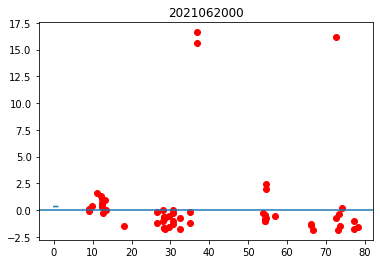

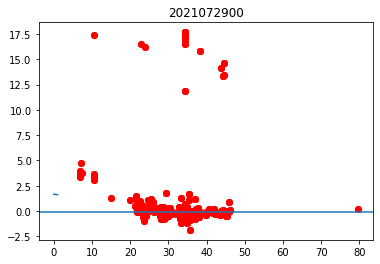

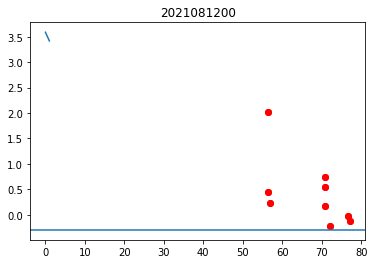

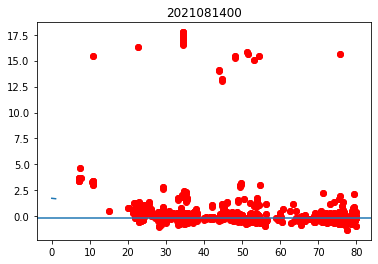

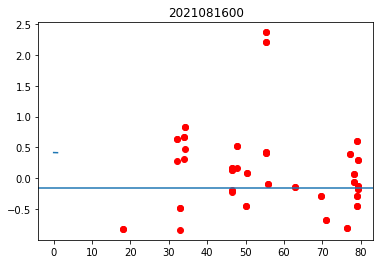

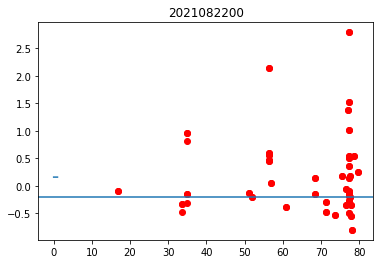

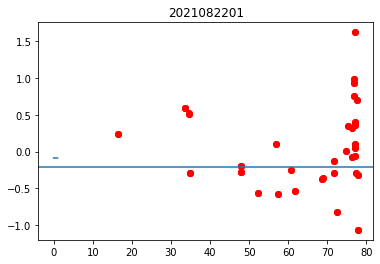

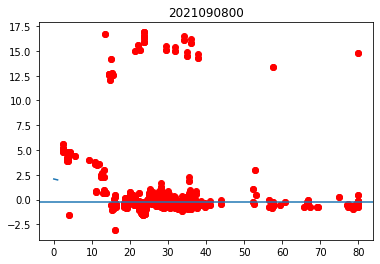

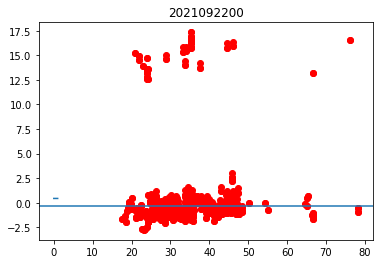

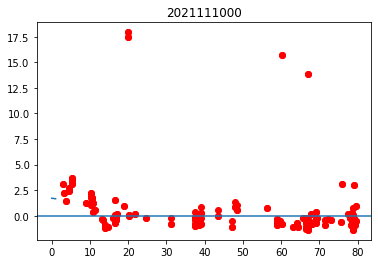

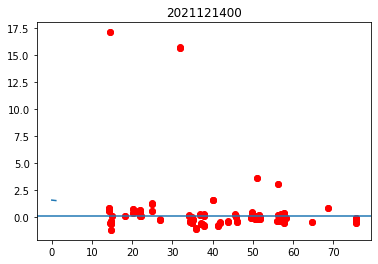

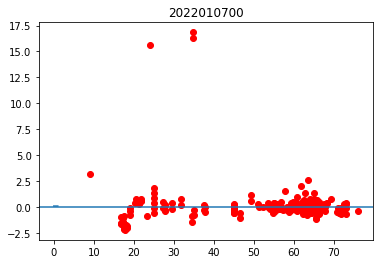

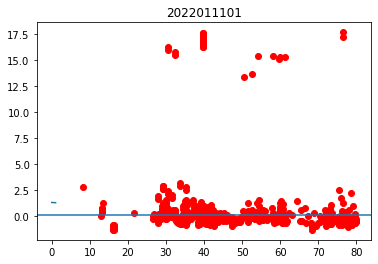

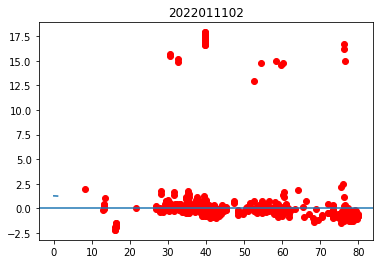

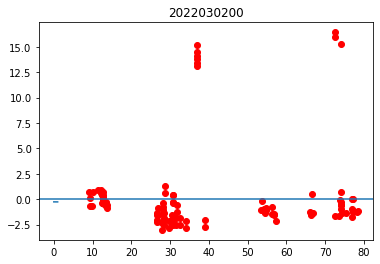

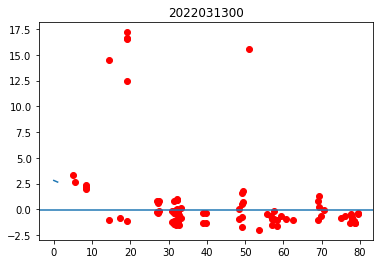

/home/ljaffe7/anaconda3/envs/rtergpy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning:

Polyfit may be poorly conditioned



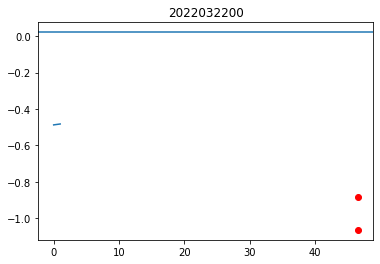

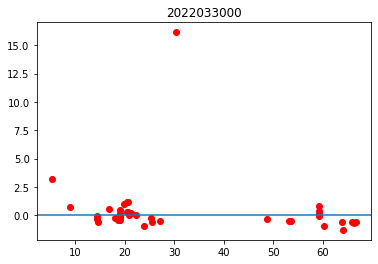

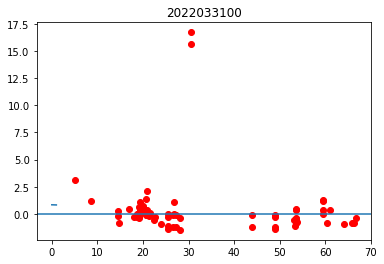

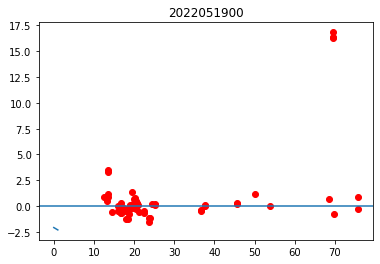

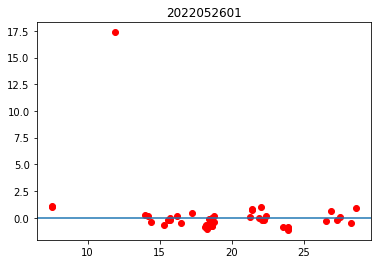

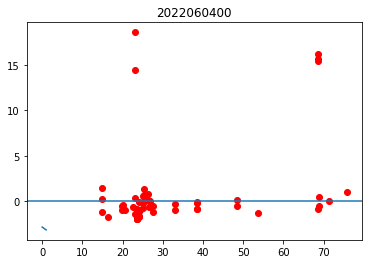

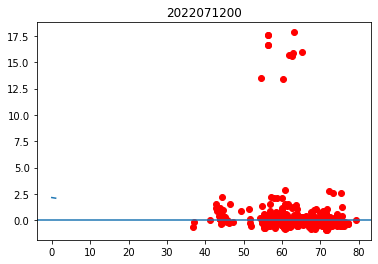

In [6]:
degrees=np.linspace(0,80,1)
for event in eventlist:
    dfevent=dfB[dfB['eventname'] == event]
    lognorm = dfevent['ebbcorrpertaclognorm'].tolist()
    lognormmean=np.mean(lognorm)

    dfeventRS=dfRS[dfRS['eventname'] == event]
    ebblognormRS = dfeventRS["ebbcorrpertaclognorm"].to_numpy() 
    distlognormRS=dfeventRS["dist_degrees"].to_numpy() 
 
    plt.figure()
    ax=plt.axes()
    plt.title(event)
    ax.scatter(distlognormRS, ebblognormRS, marker='o', label='Scatter', color='red')
    ax.axhline(lognormmean)
    z = np.polyfit(distlognormRS, ebblognormRS, 1)
    p = np.poly1d(z)
    ax.plot(p(z))
    
    plt.show()


In [ ]:
###T test

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', 
                      permutations=None, random_state=None, alternative='two-sided', trim=0)